# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando librerias

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal


In [53]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

## Importando datos

In [54]:
df=pd.read_csv("../data/raw/housing.csv", header=None, sep="\s+") # header no existe, y ademas tiene una seperacion por espacios \s+ (separacion por espacios)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [55]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Entendiendo los datos

1. CRIM: tasa de delincuencia per cápita por ciudad

2. ZN: proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

3. INDUS: proporción de acres de negocios no minoristas por ciudad

4. CHAS: variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

5. NOX: concentración de óxidos nítricos (partes por cada 10 millones)

6. RM: número promedio de habitaciones por vivienda

7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. DIS: distancias ponderadas a cinco centros de empleo de Boston

9. RAD: índice de accesibilidad a carreteras radiales

10. TAX: tasa de impuesto sobre la propiedad de valor total por cada $10,000

11. PTRATIO: relación alumno-maestro por ciudad

12. B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13. LSTAT: % de estatus social bajo de la población

14. MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)



Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

* DIS: distancias ponderadas a cinco centros de empleo de Boston
* INDUS: proporción de acres de negocios no minoristas por ciudad
* CRIM: tasa de delincuencia per cápita por ciudad
* RM: número promedio de habitaciones por vivienda
* MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

### Análisis de datos para tu primera regresión lineal


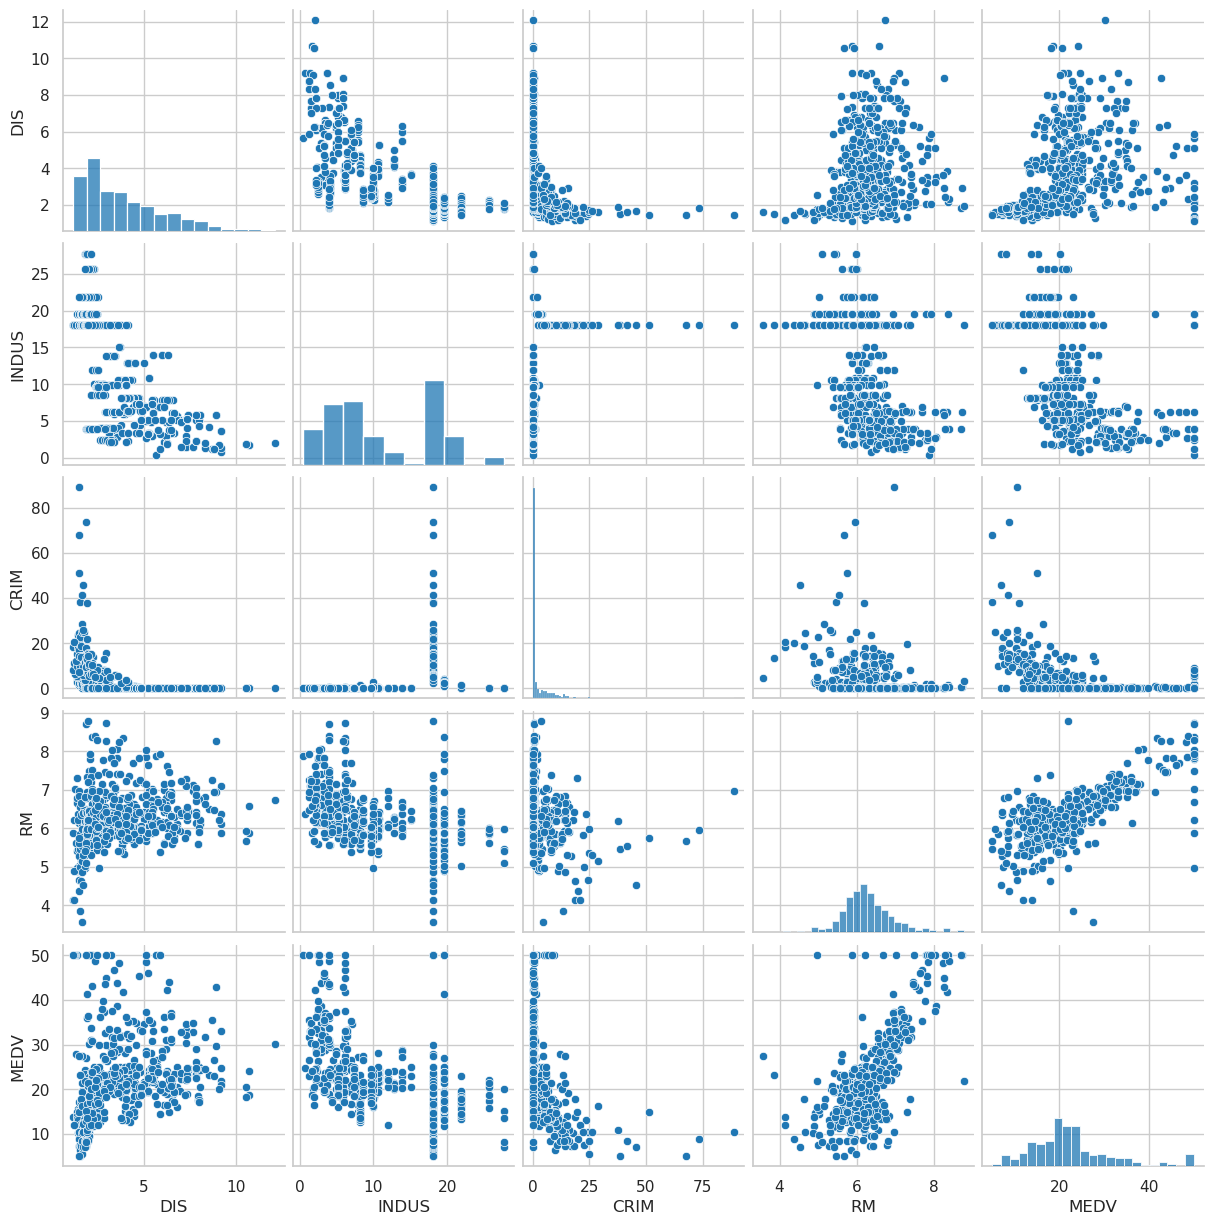

In [56]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV'] # columnas a graficar
sns.pairplot(df[cols], height=2.5 ) 
plt.show()

### Insight

Al observar la distribución de la variable **MEDV**, podemos ver que se asemeja a una **distribución normal** con algunos valores atípicos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable **RM** también muestra un similitud a una distribución normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV. Por lo tanto, se podría utilizar esta relación para construir un modelo de regresión lineal que prediga el valor de MEDV en función de RM.

### Análisis numérico

Al realizar un **análisis visual** de un conjunto de datos, **se obtienen ideas generales de las relaciones entre las variables y patrones**. Sin embargo,**es importante complementarlo con un análisis numérico para confirmar que nuestras suposiciones** para confirmar si son correctas.

**El análisis numérico** puede incluir el cálculo de medidas estadísticas como la **media, la mediana y la desviación estándar**, así como la realización de **pruebas de hipótesis** y la evaluación de **correlaciones entre variables**.

En este caso, **se observa una relación aparentemente lineal**, por lo cual **es necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza**. Asimismo, **en cuanto a los valores atípicos**, es necesario analizar numéricamente su **impacto en las medidas estadísticas** y determinar si deben ser excluidos o si representan información importante.

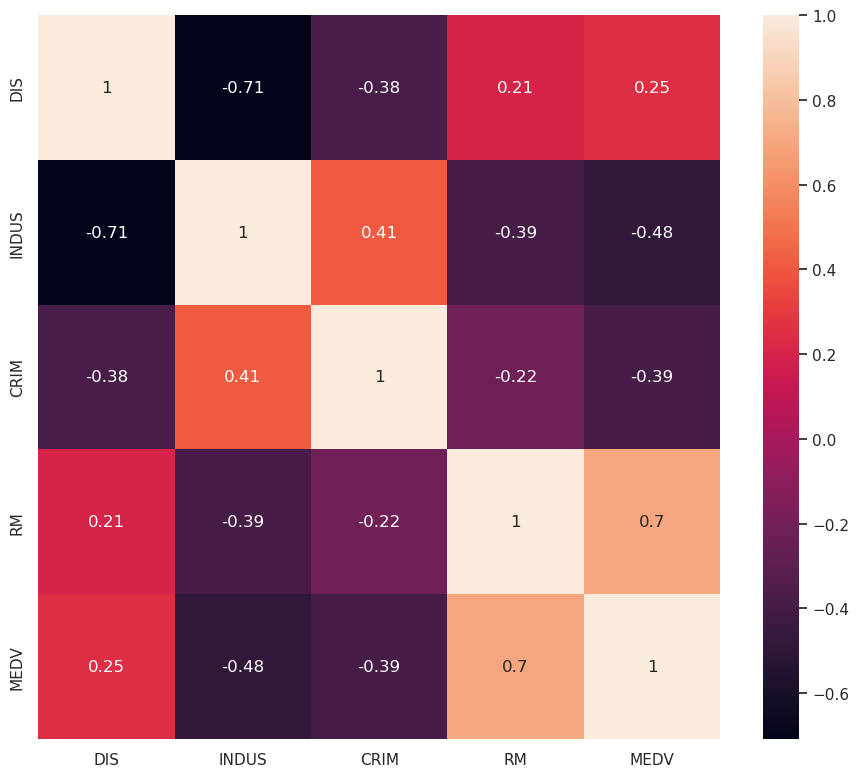

In [57]:
(
    sns.heatmap(
        data=df[cols].corr(numeric_only=True),
        cbar=True,
        annot=True,
        yticklabels=cols,
        xticklabels=cols
    )
);

### Insight 

* En particular, se observó que la correlación entre las variables RM(número promedio de habitaciones por vivienda) y MEDV(valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)) es positiva y relativamente alta en comparación con las demás variables. **Esto significa que a medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV)**.

* La correlación entre INDUS(proporción de acres de negocios no minoristas por ciudad) y DIS(distancias ponderadas a cinco centros de empleo de Boston) es negativa, es decir, esto podría indicar **que a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston.**

* La correlación entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporción de acres de negocios no minoristas por ciudad (INDUS) es de -0.483. Esta correlación negativa **sugiere que a medida que aumenta la proporción de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir.**

## Creando modelo con scikit-learn

### Entrenando un modelo de regresión lineal con scikit-learn
### ¿Qué es un modelo de regresion lineal?

**Un modelo de regresión lineal se utiliza para encontrar la línea recta que mejor se ajusta a los datos y que se puede utilizar para hacer predicciones sobre nuevos datos.** La fórmula incluye términos de intercepción y coeficiente de regresión, y el objetivo del modelo es minimizar la suma de los cuadrados de los errores para obtener la mejor línea recta.

Ahora realizaremos un modelo de *regresión lineal simple para predecir el precio de una casa* (variable dependiente) *en función del promedio de habitaciones* (variable independiente).

La idea del siguiente ejercicio es ver como se utiliza un modelo de regresión lineal simple para predecir la mediana del precio de las casas en Boston a partir del número promedio de habitaciones.

1. Guardamos los datos de interés en una variable x e y

In [59]:
x= df['RM'].values.reshape(-1,1) # variable independiente
y= df['MEDV'].values.reshape(-1,1) # variable dependiente

2. Instanciamos el modelo de escalamiento con standardscaler de skelarn para minimizar los errores

In [60]:
sc_x = StandardScaler()
sc_y = StandardScaler()

3. Estandarizamos los datos z=(x-u)/std

In [61]:
x_standar=sc_x.fit_transform(x)
y_standar=sc_y.fit_transform(y)

4. Instanciamos y ajustamos el modelo de regresión lineal con sklearn

In [63]:
slr = LinearRegression() 
slr.fit(x_standar, y_standar) # crear la linea recta que mejor se ajuste a los datos


LinearRegression()

5. Graficamos los datos estandarizados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

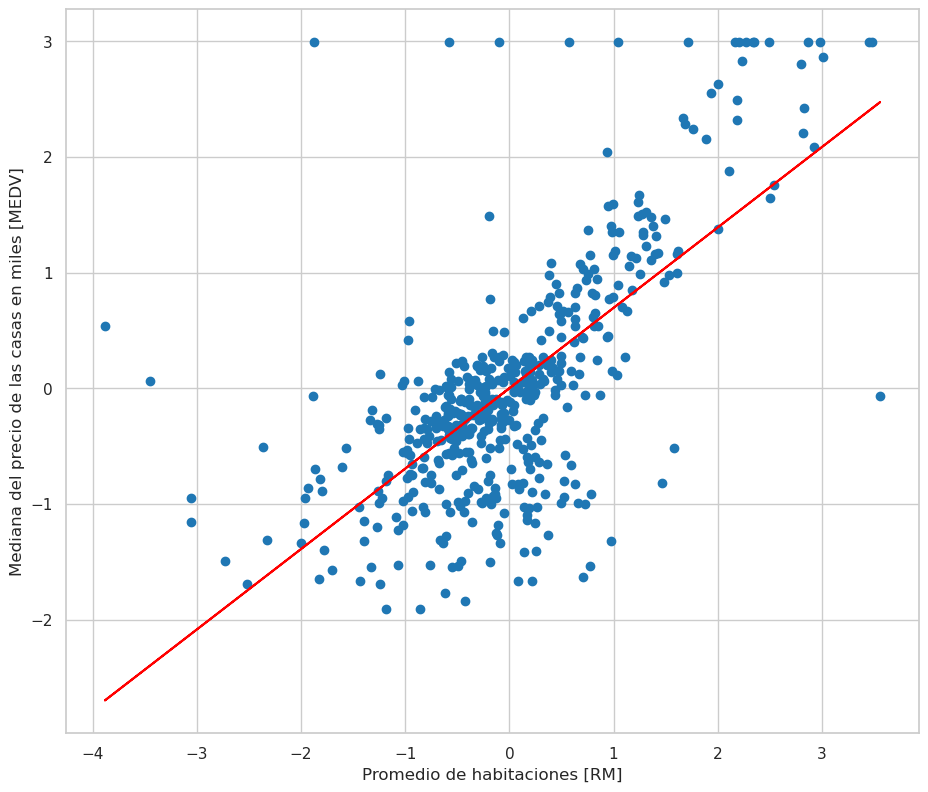

In [64]:
plt.scatter(x_standar,y_standar) # graficar los datos dos variables

plt.plot(x_standar,slr.predict(x_standar), color='r' ) # graficar la linea de regresion, luego usamos slr.predict para predecir los valores de x

plt.ylabel("Mediana del precio de las casas en miles [MEDV]"  )
plt.xlabel("Promedio de habitaciones [RM]")

6. Generando predicción con el modelo

In [71]:
# ¿cuanto cuesta una casa con 5 habitaciones?
num_habitaciones = 5

# estandarizamos el numero de habitaciones, con el metodo transform de la libreria de sklearn, ya que recive un arreglo de numpy, se le tiene que decir np.array pasamos el # de habitaciones como lista y al final reshape para que sea un arreglo de numpy
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

result=sc_y.inverse_transform(slr.predict(num_habitaciones_standard))

print(f"El precio de una casa con {num_habitaciones} habitaciones es de {result*1000}")

# creamos nuestra prediccion con slr.predic del # de habitaciones estandarizado.

El precio de una casa con 5 habitaciones es de [[10839.92412946]]


# Cómo funciona la regresión lineal

## ¿Qué es la regresión lineal?
La regresión lineal es un **algoritmo de aprendizaje supervisado** utilizado para modelar la relación entre una variable dependiente (𝑌) y una o más variables independientes (𝑋).**El objetivo del modelo es encontrar la línea recta que mejor se ajusta a los datos** y utilizarla para hacer predicciones sobre nuevos datos.

### Seleccionar el modelo adecuado
**El modelo de regresión lineal simple** es el más sencillo y **se utiliza cuando solo se tiene una variable independiente (X)**.Cuando se tienen más de una variable independiente, se utiliza el modelo de **regresión lineal múltiple**.

### Definir la hipótesis:
**La hipótesis del modelo de regresión lineal es que existe una relación lineal entre la variable dependiente y la variable independiente**, si existe una relación lineal entre las variables, **se espera que los puntos se agrupen alrededor de una línea recta.** Esta relación se puede expresar mediante la siguiente ecuación:

$$ 𝑦 =𝑤0+𝑤1𝑥+𝜀 $$

donde:

* 𝑦: es la variable dependiente o variable a predecir.
* 𝑥: es la variable independiente o variable explicativa.
* 𝑤0: es el término de intercepción, que representa el valor de y cuando x es igual a cero.
* 𝑤1: es el coeficiente de regresión, que representa la pendiente de la línea recta.
* 𝑒: es el término de error, que representa la diferencia entre el valor observado y el valor predicho.

En el contexto del inteligencia artificial, **𝑤0 y 𝑤1 conocidos como w0 y w1 corresponden a los pesos del modelo**, los pesos **son valores que se utilizan para determinar la importancia relativa de cada variable de entrada en la predicción de la variable de salida**.

### Cuándo utilizar un modelo de regresión lineal

### Preguntas clave para determinar si la regresión lineal es adecuada

**¿Tengo una variable dependiente numérica que quiero predecir a partir de una variable independiente numérica?**

Si la variable dependiente (𝑌) que queremos predecir es numérica y la variable independiente (𝑋) que usamos para hacer la predicción también es numérica, entonces un modelo de regresión lineal podría ser una buena opción para resolver el problema.

**¿Cuento con una gran cantidad de variables y / o variables categóricas con muchos niveles?**

Si hay variables categóricas con muchos niveles, es posible que la regresión lineal no sea el modelo más adecuado para el análisis, ya que puede haber dificultades en la interpretación de los resultados. En este caso, podría ser más apropiado utilizar modelos de regresión logística o modelos de árbol de decisión para variables categóricas con muchos niveles.

### Recomendaciones para determinar si la regresión lineal
1 **Probar otros modelos**

La regresión lineal puede no ser el mejor modelo para todas las situaciones, por lo que siempre es recomendable explorar otros modelos, como la regresión logística, el árbol de decisión o el Random Forest, entre otros.

2 **Reducir las variables**

Si tienes muchas variables independientes, es posible que tu modelo sufra de **overfitting** o que algunas variables no sean relevantes para predecir la variable dependiente. En ese caso, se recomienda realizar **un análisis de correlación y eliminar aquellas variables con baja correlación con la variable dependiente**.

3 **Multicolinealidad**

La multicolinealidad ocurre cuando hay una alta correlación entre dos o más variables independientes, por ejemplo tener la variable de peso en kg y peso en lbs provocaria una multicolinealidad. Esto puede afectar negativamente el modelo de regresión lineal, por lo que se recomienda identificar y eliminar las variables redundantes.

4. **No predecir fuera del dominio de la variable independiente**

Es importante tener en cuenta el dominio de la variable independiente al realizar predicciones. Si se intenta predecir fuera de este rango, los resultados pueden ser poco confiables o incluso absurdos. Es importante conocer bien los límites de la variable independiente antes de realizar predicciones con regresión lineal.

### Función de pérdida y optimización: mínimos cuadrados
 
[El MSE (Mean Squared Error), o Error Cuadrático Medio](https://www.youtube.com/watch?v=k964_uNn3l0), es una medida comúnmente utilizada **para evaluar el rendimiento de modelos de regresión**. El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.

Para calcular el MSE, puedes seguir los siguientes pasos:

1. Calcula el error al cuadrado (la diferencia entre la predicción del modelo y el valor real, al cuadrado) para cada punto de datos.
2. Suma todos los errores al cuadrado.
3. Divide la suma de errores al cuadrado por el número de puntos de datos para obtener el MSE.

La fórmula para calcular el MSE es:

$$ 𝑀𝑆𝐸=1/𝑛 ∗Σ(𝑦𝑖−𝑦^𝑖)^2 $$

 

Donde:

* 𝑛: es el número de puntos de datos
* 𝑦𝑖: es el valor real del i-ésimo punto de datos
𝑦^𝑖: es la predicción del modelo para el i-ésimo punto de datos.


Hagamos el paso a paso de como calcular el MSE con un conjunto de entrada aleatorio ascendente:

Teniendo en cuenta la formula del Error Cuadrático Medio, requerimos saber el valor de 𝑦′, por lo tanto calcularemos la predicción 𝑦′ utilizando la recta de regresión lineal

$$ 𝑦′=𝑚∗𝑥+𝑏 $$

donde

$$ 𝑚=(𝑛∗∑𝑥𝑦−(∑𝑥)(∑𝑦))/(𝑛∗∑𝑥^2)−(∑𝑥)^2 $$

 

$$ 𝑏=(∑𝑦−𝑚∗∑𝑥)/𝑛 $$

​


1. Se definen los datos de entrada


In [72]:
x=np.array([1.2, 2,3.2,2.5,5,6,4,8])
y=np.array([2,3,3.4,3.1,4,4.7,3.8,7])

# calcular el tamaño del conjunto de datos
n = len(x)

2. Se calculan las sumas de los productos de los elementos de x e y, x^2, y las sumas de los elementos de x e y

In [75]:
xy= np.sum((x*y), axis=0)
x_2 = np.sum((x**2), axis=0)

sum_x=np.sum(x,axis=0)
sum_y=np.sum(y,axis=0)

3. Se define la función para calcular la pendiente de la recta de regresión lineal


In [76]:
def m():
    numerador = (n*xy) - (sum_x * sum_y)
    denominador = (n*x_2) - (sum_x)**2
    return np.divide(numerador,denominador)

# Se calcula la pendiente m
m = m()

4. Se define la función para calcular la intercepción de la recta de regresión lineal

In [77]:
def b():
    numerador = sum_y - (m * sum_x)
    denominador = n
    return np.divide(numerador, denominador)

# Se calcula la intercepción b
b = b()

5. Se define la función para calcular la predicción y' utilizando la recta de regresión lineal

In [78]:
def f():
    return (m*x)+b

6. Se calcula la predicción y'


In [79]:
y_prima = f()
# Se calcula la suma de las predicciones y'

sum_y_prima = np.sum(y_prima, axis=0)

7. Se define la función para calcular el MSE

In [80]:
def MSE():
    return (1/n) * np.sum((y - y_prima)**2, axis=0)

# Se calcula el MSE
mse = MSE()

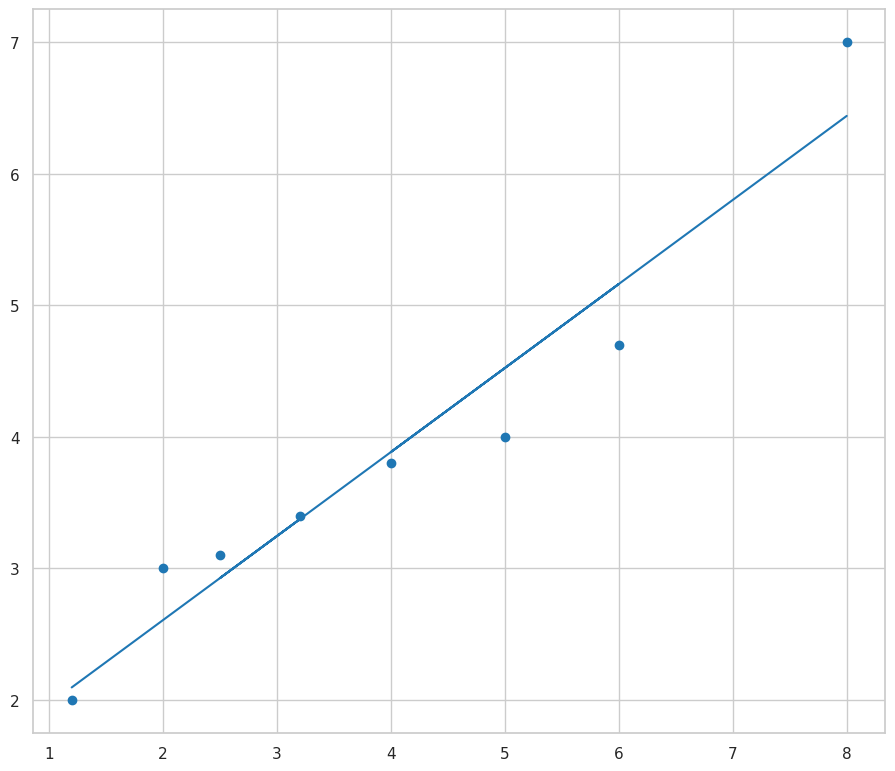

In [82]:
plt.plot(x,y_prima)
plt.scatter(x,y);

In [83]:
df_mse = pd.DataFrame.from_dict({
    "x"       :x,
    "y"       :y,
    "y_prima" :y_prima,
    "xy"      :xy,
    "x_2"     :x_2,
    "sum_x"   :sum_x,
    "sum_y"   :sum_y,
    "m"       :m,
    "b"       :b,
    "mse"     :mse
},)
df_mse

,x,y,y_prima,xy,x_2,sum_x,sum_y,m,b,mse
0,1.2,2.0,2.094815,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
1,2.0,3.0,2.605720,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
2,3.2,3.4,3.372078,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
3,2.5,3.1,2.925036,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
4,5.0,4.0,4.521614,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
5,6.0,4.7,5.160246,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
6,4.0,3.8,3.882983,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
7,8.0,7.0,6.437508,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379


### Evaluando el modelo: R^2 y MSE
El propósito de evaluar un modelo de regresión e**s determinar qué tan bien se ajusta el modelo a los datos de entrenamiento y cómo de bien generaliza a nuevos datos.** Esto es importante porque **un modelo que se ajusta muy bien a los datos de entrenamiento puede tener un sobreajuste (overfitting)**. Por otro lado, **un modelo que no se ajusta bien a los datos de entrenamiento puede subestimar la relación entre las variables y no ser capaz de predecir de manera efectiva los valores de la variable objetivo.**

El error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado R^2)  son dos métricas comunes que se usan para evaluar el rendimiento de un modelo de regresión.

### El error cuadrático medio (MSE)

El error cuadrático medio (MSE) es otra métrica utilizada para evaluar modelos de regresión. El MSE mide el promedio de los cuadrados de los errores de predicción entre el modelo y los valores reales en el conjunto de datos. En otras palabras, el MSE calcula la diferencia cuadrática promedio entre los valores predichos por el modelo y los valores reales observados. **Cuanto menor sea el valor de MSE, mejor será el ajuste del modelo a los datos.**

![ok](https://gbhat.com/assets/gifs/linear_regression.gif)

**El coeficiente de determinación (𝑅^2)**

El coeficiente de determinación, denotado por R-cuadrado o R^2, es una métrica **que indica qué porcentaje de la variabilidad en la variable dependiente puede ser explicada por la variable independiente en un modelo de regresión lineal.** Es decir, R-cuadrado mide la calidad del ajuste del modelo a los datos. **El valor de R-cuadrado varía entre 0 y 1**, donde **0 indica que el modelo no explica ninguna de la variabilidad** en la variable dependiente y **1 indica que el modelo explica toda la variabilidad**. Por lo tanto, **cuanto mayor sea el valor de R-cuadrado, mejor será el ajuste del modelo a los datos.**


![ok](https://bookdown.org/pkaldunn/Book/34-Correlation_files/figure-html/R2Plots-.gif)

### Otras metricas importantes a conciderar
* **R ajustada (R² ajustada):** La R ajustada es una medida de la cantidad de variación en la variable dependiente que es explicada por la variable independiente(s) en el modelo. A diferencia de la R², la R ajustada penaliza por la inclusión de variables irrelevantes o redundantes en el modelo.

* **Error máximo:** Esta métrica mide el mayor error absoluto en las predicciones del modelo. Es útil para identificar observaciones que están lejos de la línea de regresión y que pueden estar afectando la calidad del modelo.

* **Error absoluto promedio (MAE):** El MAE mide el promedio de los errores absolutos en las predicciones del modelo. Es útil para tener una idea de la magnitud promedio de los errores de predicción.

* **Mediana del los errores absolutos:** La mediana del error absoluto es una medida de la centralidad que indica el valor de la predicción que tiene la mitad de los errores por debajo y la otra mitad por encima. Es útil cuando los datos están sesgados y la media no es una medida representativa de los errores.

* **Raíz del promedio de los errores cuadrados (RMSE):** El RMSE mide el error promedio de las predicciones del modelo en unidades de la variable dependiente. Es una medida común para evaluar la precisión de los modelos de regresión.

* **Varianza explicada:** La varianza explicada mide la proporción de la varianza total en la variable dependiente que es explicada por la variable independiente(s) en el modelo. Es útil para evaluar la calidad del ajuste del modelo y comparar modelos diferentes.

### La gráfica de residuales
La gráfica de residuales es una herramienta de diagnóstico que se utiliza para evaluar la calidad del ajuste de un modelo de regresión lineal. En esta gráfica, se grafican los residuos del modelo (la diferencia entre los valores observados y los valores predichos por el modelo) en el eje vertical y los valores predichos por el modelo en el eje horizontal.

Una buena gráfica de residuales debería mostrar una distribución aleatoria de los residuos alrededor del valor cero en el eje vertical. Esto indicaría que el modelo se ajusta bien a los datos y que los residuos no tienen patrones discernibles. Si hay patrones en la distribución de los residuos, como una curva en forma de U o una relación no lineal, esto sugiere que el modelo no se ajusta bien a los datos.

En resumen, la gráfica de residuales es una herramienta visual que nos ayuda a entender cómo se distribuyen los residuos en relación con los valores predichos por el modelo. Si los residuos tienen un patrón discernible, es una señal de que el modelo puede no estar ajustándose bien a los datos y puede ser necesario realizar ajustes en el modelo o en los datos de entrada.